# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

## ⚠️ AI-Generated Content Warning

**This notebook was generated by AI and has not been fully verified. Please be cautious when interpreting the code or results. Always validate findings independently before drawing conclusions.**

## Overview

This notebook explores [Dandiset 001375](https://dandiarchive.org/dandiset/001375), which contains neurophysiology data from experiments investigating the effects of disrupting septal GABAergic activity using Designer Receptors Exclusively Activated by Designer Drugs (DREADDs) on hippocampal and neocortical activity.

The dataset contains electrophysiology recordings from mice running in a virtual hallway task. The recordings include neural activity from multiple brain regions, with a focus on the hippocampus and cortex. This research helps understand how disruption of inhibitory neurons in the septum affects neural processing in these connected regions.

In this notebook, we will:

1. Load and examine the metadata for the Dandiset
2. Explore the electrophysiology data structure and properties
3. Analyze neural firing patterns of individual units (neurons)
4. Visualize the relationship between neural activity and behavioral trials
5. Examine raw electrophysiology signals and frequency characteristics

## Required Packages

The following packages are required to run this notebook:

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style for better visualizations
sns.set_theme()

## Loading the Dandiset

We'll use the DANDI API to access the Dandiset and explore its contents:

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")

# Handle contributors, which might be a list of dictionaries or strings
contributors = metadata.get('contributor', [])
if contributors and isinstance(contributors[0], dict):
    # If contributors are dictionaries, extract names if available
    contributor_names = []
    for contributor in contributors:
        if isinstance(contributor, dict):
            name = contributor.get('name', str(contributor))
            contributor_names.append(name)
    print(f"Contributors: {', '.join(contributor_names)}")
else:
    # If contributors are strings or another format
    print(f"Contributors: {', '.join(str(c) for c in contributors)}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nNWB files in the dataset:")
for asset in assets:
    print(f"- {asset.path} ({asset.size/1e9:.1f} GB)")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors: Eckert, Michael, NIH Brain, McNaughton, Bruce, Ferbinteanu, Janina

Found 3 assets in the dataset

NWB files in the dataset:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (55.0 GB)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (69.4 GB)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (69.8 GB)


## Loading and Exploring an NWB File

Let's load the first NWB file from subject MS13B to explore its content. This file contains electrophysiology recordings from a mouse running laps in a virtual hallway.

In [3]:
# Select the first NWB file to analyze
selected_asset = assets[0]
asset_id = selected_asset.identifier
asset_path = selected_asset.path
nwb_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

print(f"Loading NWB file: {asset_path}")
print(f"Asset URL: {nwb_url}")
print(f"Neurosift link: https://neurosift.app/nwb?url={nwb_url}&dandisetId=001375&dandisetVersion=draft")

# Load the NWB file
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
Asset URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/
Neurosift link: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Basic Metadata and File Structure

Let's examine the basic metadata and structure of the NWB file:

In [4]:
# Print basic metadata
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File creation date: {nwb.file_create_date[0]}")

# Print subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

# List the available data types in the file
print("\nAvailable data types in the NWB file:")
for data_group in ["acquisition", "analysis", "intervals", "units"]:
    if hasattr(nwb, data_group) and getattr(nwb, data_group):
        # Special handling for 'units' which doesn't have keys() method
        if data_group == "units":
            print(f"- {data_group}: [unit data with {len(nwb.units.id)} units]")
        else:
            print(f"- {data_group}: {list(getattr(nwb, data_group).keys())}")

Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00
File creation date: 2025-04-05 16:50:15.663983-07:00

Subject Information:
Subject ID: MS13B
Species: Mus musculus
Sex: M
Age: P90D
Description: medial septum DREADD to suppress GABA interneurons

Available data types in the NWB file:
- acquisition: ['time_series']
- intervals: ['trials']
- units: [unit data with 33 units]


## Exploring Electrode Groups and Recording Devices

Let's look at the electrode groups and recording devices used in this experiment:

In [5]:
# Print electrode group information
print("Electrode Groups:")
for name, group in nwb.electrode_groups.items():
    print(f"\nGroup: {name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device: {group.device.description} (Manufacturer: {group.device.manufacturer})")

# Get a count of all electrodes
print("\nElectrode Information:")
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Total electrode count: {len(electrodes_df)}")

# Display electrodes by group
group_counts = electrodes_df['group_name'].value_counts()
print("\nElectrodes by group:")
for group, count in group_counts.items():
    print(f"  {group}: {count} electrodes")

Electrode Groups:

Group: shank1
  Description: shank1, electrodes
  Location: ventral hippocampus, visual cortex
  Device: 128 ch silicon probe (Manufacturer: UCLA)

Group: shank2
  Description: shank2, electrodes
  Location: ventral hippocampus, visual cortex
  Device: 128 ch silicon probe (Manufacturer: UCLA)

Electrode Information:
Total electrode count: 256

Electrodes by group:
  shank1: 128 electrodes
  shank2: 128 electrodes


## Exploring Trial Structure

Let's examine the trial structure to understand the behavioral context of the recordings:

Number of trials: 387

First 5 trials:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467

Trial duration statistics:
Mean duration: 12.30 seconds
Median duration: 10.86 seconds
Min duration: 7.66 seconds
Max duration: 164.31 seconds
Std dev of duration: 8.97 seconds


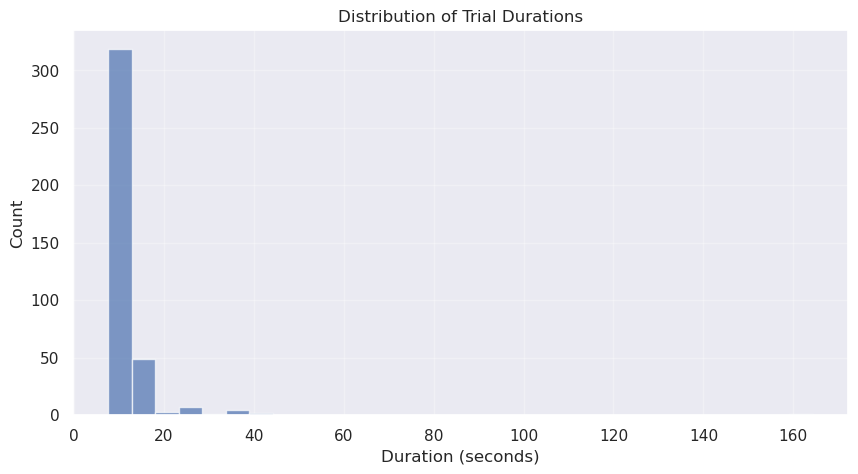

In [6]:
# Get trial information
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")
print("\nFirst 5 trials:")
print(trials_df.head())

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

# Display trial duration statistics
print("\nTrial duration statistics:")
print(f"Mean duration: {trials_df['duration'].mean():.2f} seconds")
print(f"Median duration: {trials_df['duration'].median():.2f} seconds")
print(f"Min duration: {trials_df['duration'].min():.2f} seconds")
print(f"Max duration: {trials_df['duration'].max():.2f} seconds")
print(f"Std dev of duration: {trials_df['duration'].std():.2f} seconds")

# Plot histogram of trial durations
plt.figure(figsize=(10, 5))
plt.hist(trials_df['duration'], bins=30, alpha=0.7)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations')
plt.grid(True, alpha=0.3)
plt.show()

The histogram shows that most trials last about 10-15 seconds, with a right-skewed distribution. Some outlier trials last much longer, possibly indicating trials where the mouse paused or had difficulty completing the task.

## Exploring Neural Units

Now let's examine the neural units (sorted neurons) recorded in this experiment:

Number of units: 33

Units with most spikes:
 unit_id  spike_count  firing_rate
       3       278061    57.658865
      10       214826    44.546425
      16       154373    32.010861
       9       154188    31.972499
       8       122980    25.501193

Units with fewest spikes:
 unit_id  spike_count  firing_rate
      30        16017     3.321293
      26        15914     3.299935
      17        13063     2.708750
      14         9402     1.949603
      18         8291     1.719226


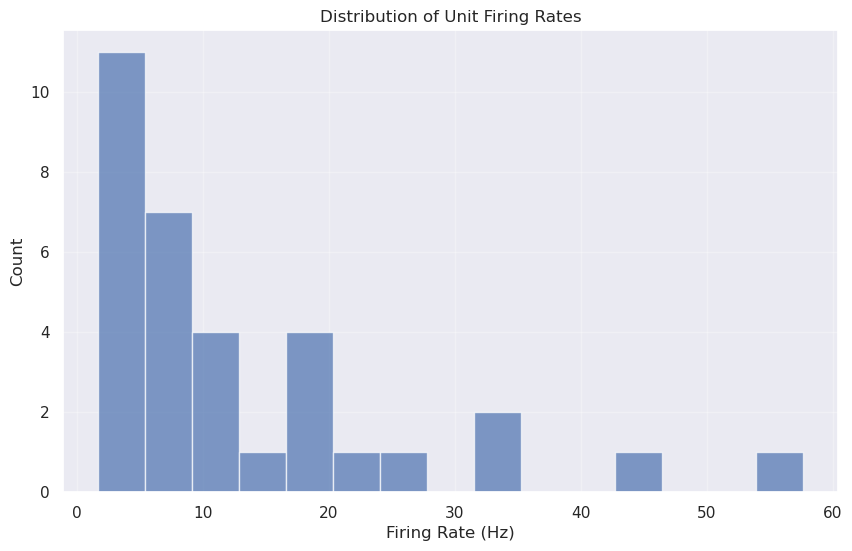

In [7]:
# Get unit information
units = nwb.units
units_df = units.to_dataframe()
print(f"Number of units: {len(units_df)}")

# Function to get spike times for a specific unit
def get_spike_times(units, unit_idx):
    return units.get_unit_spike_times(unit_idx)

# Calculate spike counts and firing rates for each unit
unit_info = []
recording_duration = nwb.acquisition["time_series"].data.shape[0] / nwb.acquisition["time_series"].rate

for i, unit_id in enumerate(units.id[:]):
    spike_times = get_spike_times(units, i)
    firing_rate = len(spike_times) / recording_duration
    unit_info.append({
        'unit_id': unit_id,
        'spike_count': len(spike_times),
        'firing_rate': firing_rate
    })

unit_df = pd.DataFrame(unit_info)
unit_df.sort_values('spike_count', ascending=False, inplace=True)

# Display units with most and fewest spikes
print("\nUnits with most spikes:")
print(unit_df.head(5).to_string(index=False))

print("\nUnits with fewest spikes:")
print(unit_df.tail(5).to_string(index=False))

# Plot distribution of firing rates
plt.figure(figsize=(10, 6))
plt.hist(unit_df['firing_rate'], bins=15, alpha=0.7)
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Count')
plt.title('Distribution of Unit Firing Rates')
plt.grid(True, alpha=0.3)
plt.show()

The firing rate distribution shows that most units have relatively low firing rates (below 20 Hz), with a smaller number of highly active units with firing rates above 30 Hz. This distribution is typical for extracellular recordings, where inhibitory interneurons often show higher firing rates than excitatory projection neurons.

## Visualizing Spike Rasters for Top Units

Let's visualize the spike times of the most active units to understand their firing patterns:

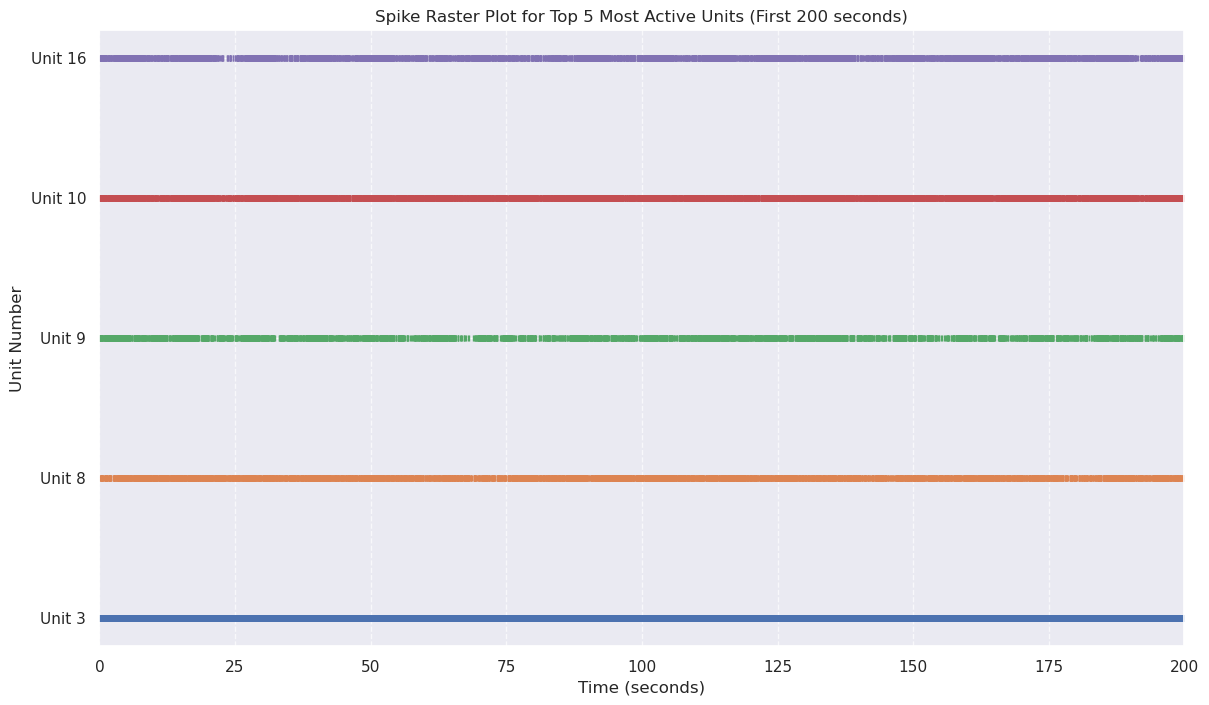

In [8]:
# Select the top 5 most active units
top_units = unit_df.head(5)['unit_id'].values
top_unit_indices = [i for i, uid in enumerate(units.id[:]) if uid in top_units]

plt.figure(figsize=(14, 8))

# Plot spike raster for the top 5 most active units
for i, unit_idx in enumerate(top_unit_indices):
    unit_id = units.id[unit_idx]
    spike_times = get_spike_times(units, unit_idx)
    
    # Limit to the first 200 seconds for better visualization
    mask = spike_times < 200
    spike_times_subset = spike_times[mask]
    
    plt.plot(spike_times_subset, np.ones_like(spike_times_subset) * (i + 1), '|', 
             markersize=4, label=f"Unit {unit_id}")

plt.xlabel('Time (seconds)')
plt.ylabel('Unit Number')
plt.yticks(range(1, len(top_unit_indices) + 1), [f"Unit {units.id[idx]}" for idx in top_unit_indices])
plt.title('Spike Raster Plot for Top 5 Most Active Units (First 200 seconds)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 200)
plt.show()

The raster plot shows the firing patterns of the top 5 most active units over the first 200 seconds of recording. We can observe that these units have different firing patterns, with some showing more regular activity and others displaying more burst-like activity. These patterns could reflect different neuronal types or functional roles in the circuit.

## Inter-Spike Interval Analysis

Let's analyze the inter-spike intervals (ISIs) for the most active unit to better understand its firing pattern:

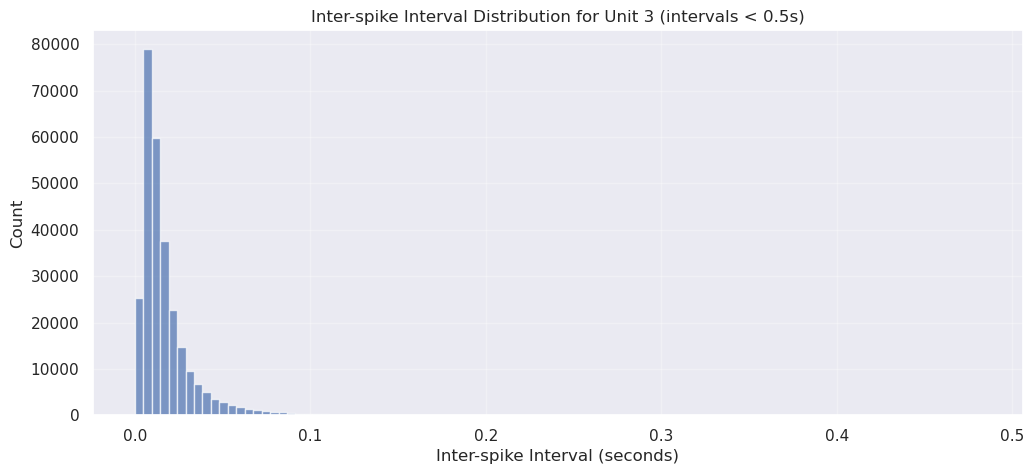

In [9]:
# Select the most active unit
most_active_unit_idx = top_unit_indices[0]
most_active_unit_id = units.id[most_active_unit_idx]
spike_times = get_spike_times(units, most_active_unit_idx)

# Calculate inter-spike intervals
isi = np.diff(spike_times)

plt.figure(figsize=(12, 5))
plt.hist(isi[isi < 0.5], bins=100, alpha=0.7)
plt.xlabel('Inter-spike Interval (seconds)')
plt.ylabel('Count')
plt.title(f'Inter-spike Interval Distribution for Unit {most_active_unit_id} (intervals < 0.5s)')
plt.grid(True, alpha=0.3)
plt.show()

The inter-spike interval histogram shows a sharp peak at very short intervals, indicating that this unit often fires bursts of action potentials in rapid succession. This pattern is characteristic of burst firing, which is commonly observed in certain types of neurons such as pyramidal cells in the hippocampus.

## Relationship Between Neural Activity and Behavior

Now let's explore how neural activity relates to the behavioral trials. We'll create peri-event time histograms (PETHs) to see how firing rates change around trial starts:

Selected units for analysis (high, medium, low firing): [3, 5, 18]


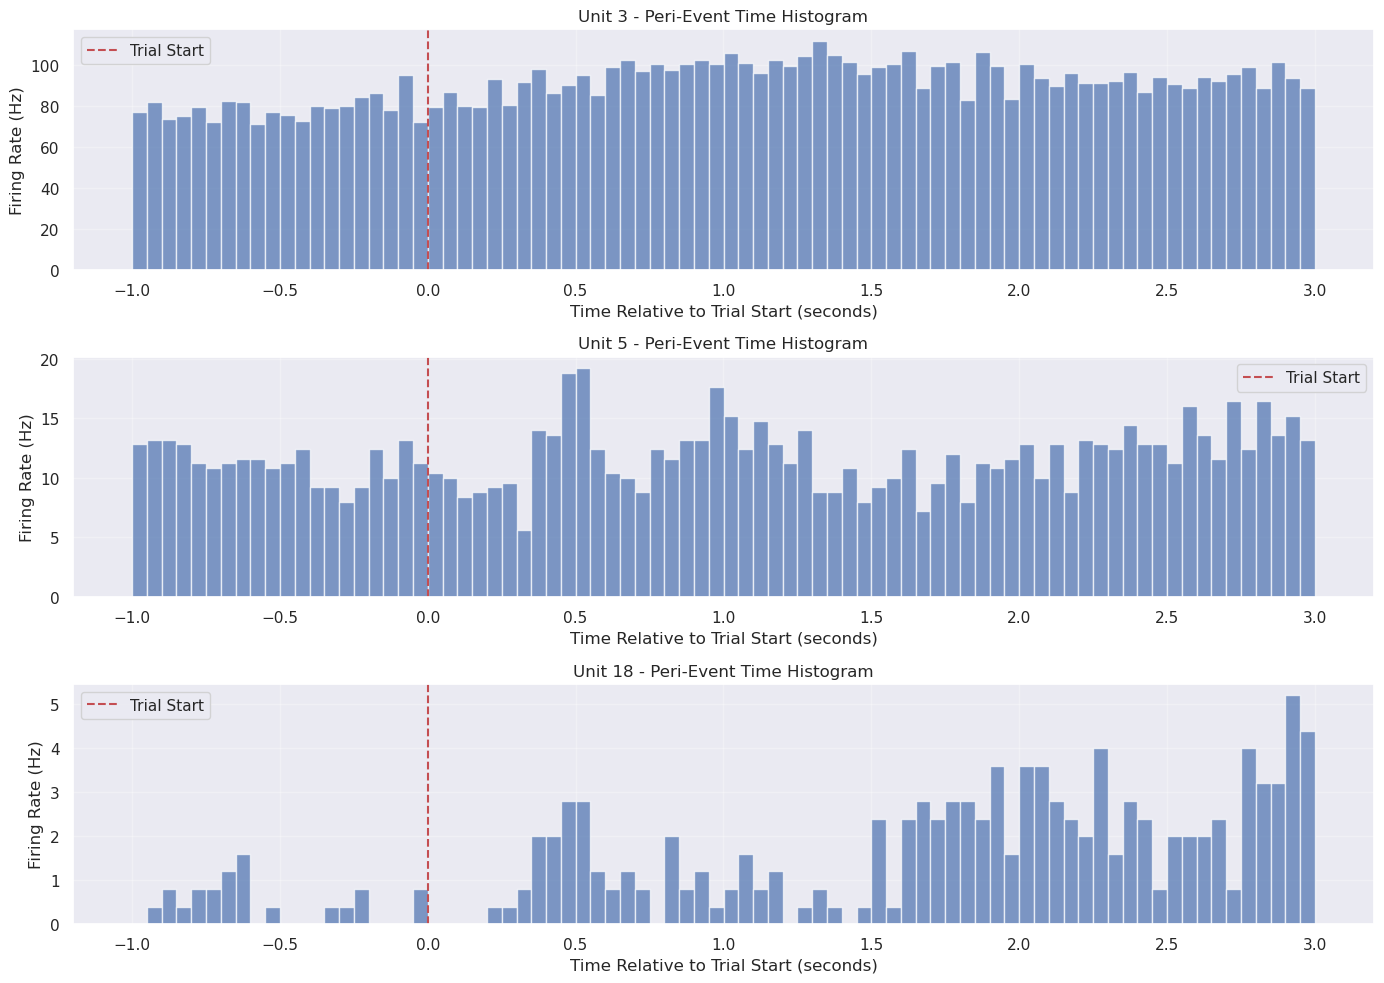

In [10]:
# Function to create peri-event time histograms (PETHs)
def create_peth(spike_times, event_times, window=(-1, 3), bin_size=0.05):
    """Create a peri-event time histogram for spikes around events"""
    bins = np.arange(window[0], window[1] + bin_size, bin_size)
    counts = np.zeros((len(event_times), len(bins) - 1))
    
    for i, event in enumerate(event_times):
        # Align spikes to this event
        aligned_spikes = spike_times - event
        
        # Count spikes in each bin
        hist, _ = np.histogram(aligned_spikes, bins=bins)
        counts[i] = hist
    
    # Average across events
    average_counts = np.mean(counts, axis=0)
    bin_centers = bins[:-1] + bin_size/2
    
    return bin_centers, average_counts

# Get trial start times for the first 50 trials
trial_starts = trials_df['start_time'].values[:50]

# Select three units with high, medium, and low firing rates for comparison
unit_ids = units.id[:]
unit_spike_counts = []

for i in range(len(unit_ids)):
    spike_times = get_spike_times(units, i)
    unit_spike_counts.append(len(spike_times))

# Find high, medium, and low firing units
sorted_indices = np.argsort(unit_spike_counts)
high_firing_idx = sorted_indices[-1]
medium_firing_idx = sorted_indices[len(sorted_indices)//2]
low_firing_idx = sorted_indices[0]

selected_units = [high_firing_idx, medium_firing_idx, low_firing_idx]
selected_unit_ids = [unit_ids[idx] for idx in selected_units]
print(f"Selected units for analysis (high, medium, low firing): {selected_unit_ids}")

# Plot PETHs for selected units
plt.figure(figsize=(14, 10))

for i, unit_idx in enumerate(selected_units):
    unit_id = unit_ids[unit_idx]
    spike_times = get_spike_times(units, unit_idx)
    
    # Calculate PETH
    bin_centers, average_counts = create_peth(spike_times, trial_starts)
    
    # Convert to firing rate (spikes per second)
    bin_size = bin_centers[1] - bin_centers[0]
    firing_rate = average_counts / bin_size
    
    # Plot
    plt.subplot(3, 1, i+1)
    plt.bar(bin_centers, firing_rate, width=bin_size, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--', label='Trial Start')
    plt.xlabel('Time Relative to Trial Start (seconds)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'Unit {unit_id} - Peri-Event Time Histogram')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()

The peri-event time histograms show how the firing rates of three representative units (with high, medium, and low overall firing rates) change in relation to the start of trials. 

We can observe distinct patterns of activity:

- The high-firing unit shows slightly increased activity shortly after trial start
- The medium-firing unit exhibits a brief spike in activity around 0.5 seconds after trial start
- The low-firing unit has more delayed activity, increasing gradually after trial start

These different patterns may reflect different functional roles of these neurons in the behavioral task, such as processing sensory cues at trial start or coordinating motor responses during the task.

## Spike Raster Around Trial Starts

Let's also look at the trial-by-trial spike patterns for the high-firing unit around trial starts:

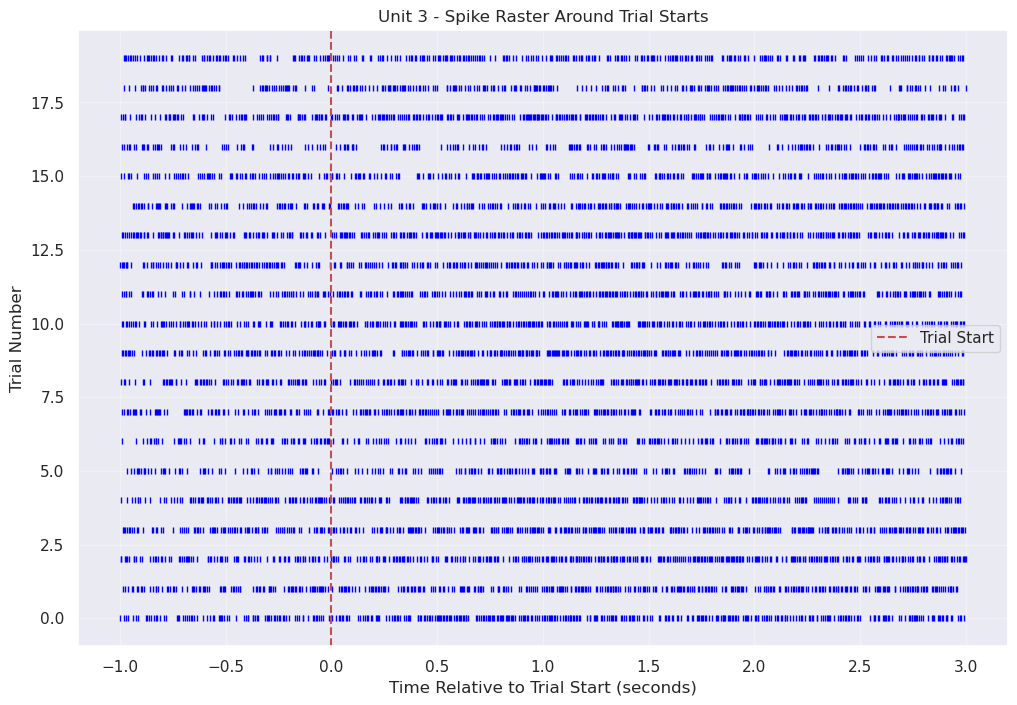

In [11]:
# Create spike raster plot around trial starts for the high-firing unit
plt.figure(figsize=(12, 8))
unit_idx = selected_units[0]
unit_id = unit_ids[unit_idx]
spike_times = get_spike_times(units, unit_idx)

# Let's just look at the first 20 trials for clarity
num_trials_to_plot = 20
window = (-1, 3)  # 1 second before to 3 seconds after trial start

for i in range(num_trials_to_plot):
    trial_start = trials_df.iloc[i]['start_time']
    
    # Find spikes within the window around this trial start
    mask = (spike_times >= trial_start + window[0]) & (spike_times <= trial_start + window[1])
    aligned_spikes = spike_times[mask] - trial_start
    
    # Plot spikes for this trial
    plt.plot(aligned_spikes, np.ones_like(aligned_spikes) * i, '|', markersize=5, color='blue')

plt.axvline(x=0, color='r', linestyle='--', label='Trial Start')
plt.xlabel('Time Relative to Trial Start (seconds)')
plt.ylabel('Trial Number')
plt.title(f'Unit {unit_id} - Spike Raster Around Trial Starts')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

The spike raster plot shows the activity of the high-firing unit around the start of the first 20 trials. We can see that there's a consistent response pattern across trials, with a slight increase in spiking activity shortly after trial start. This consistent pattern suggests a reliable neural response to the trial events.

## Exploring Raw Electrophysiology Data

Let's examine the raw electrophysiology signals to understand the underlying neural activity:

Time series data shape: (144675584, 256)
Sampling rate: 30000.0 Hz
Data unit: mV
Duration: 4822.52 seconds


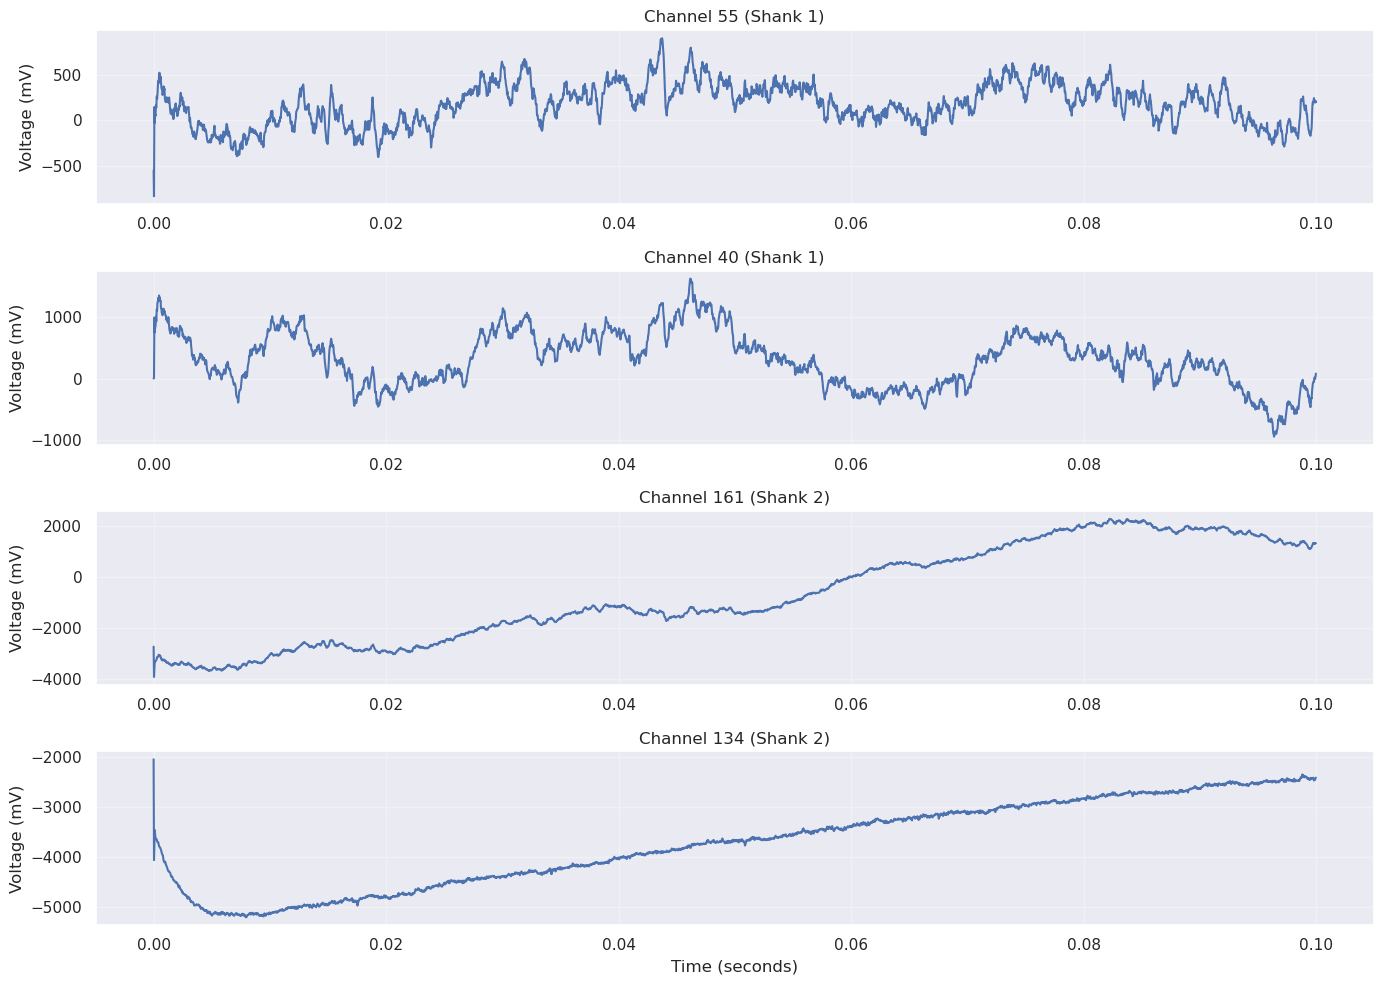

In [12]:
# Get time series data information
time_series = nwb.acquisition["time_series"]
print(f"Time series data shape: {time_series.data.shape}")
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Data unit: {time_series.unit}")
print(f"Duration: {time_series.data.shape[0] / time_series.rate:.2f} seconds")

# Extract a small segment of data for visualization (0.1 second from the start)
# We only load a small segment to avoid long loading times with remote data
sample_rate = time_series.rate
num_samples = int(sample_rate * 0.1)  # 0.1 second of data
data_segment = time_series.data[0:num_samples, :]

# Visualize signal trace for 2 random channels from each shank
plt.figure(figsize=(14, 10))

# Select 2 channels from each shank
shank1_channels = electrodes_df[electrodes_df['group_name'] == 'shank1'].index.values
shank2_channels = electrodes_df[electrodes_df['group_name'] == 'shank2'].index.values

np.random.seed(42)  # For reproducibility
selected_channels_shank1 = np.random.choice(shank1_channels, 2, replace=False)
selected_channels_shank2 = np.random.choice(shank2_channels, 2, replace=False)
selected_channels = np.concatenate([selected_channels_shank1, selected_channels_shank2])

# Create time vector for x-axis (0.1 sec)
time_vector = np.arange(0, 0.1, 1/sample_rate)

# Plot selected channels
for i, channel in enumerate(selected_channels):
    plt.subplot(4, 1, i+1)
    plt.plot(time_vector, data_segment[:, channel])
    plt.title(f"Channel {channel} (Shank {'1' if channel in shank1_channels else '2'})")
    plt.ylabel('Voltage (mV)')
    plt.grid(True, alpha=0.3)

plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()

The raw traces show the voltage signals recorded from four representative channels (two from each shank). We can observe clear differences between channels from different shanks:

- Channels from Shank 1 show oscillatory activity with relatively higher frequency components and moderate amplitudes
- Channels from Shank 2 display large voltage drifts, suggesting either electrode drift or recording from a different type of brain tissue

These raw signals form the basis for spike detection and sorting, which resulted in the unit activity we analyzed earlier.

## Calculating Power Spectra

Let's compute the power spectra of the channels to understand their frequency content:

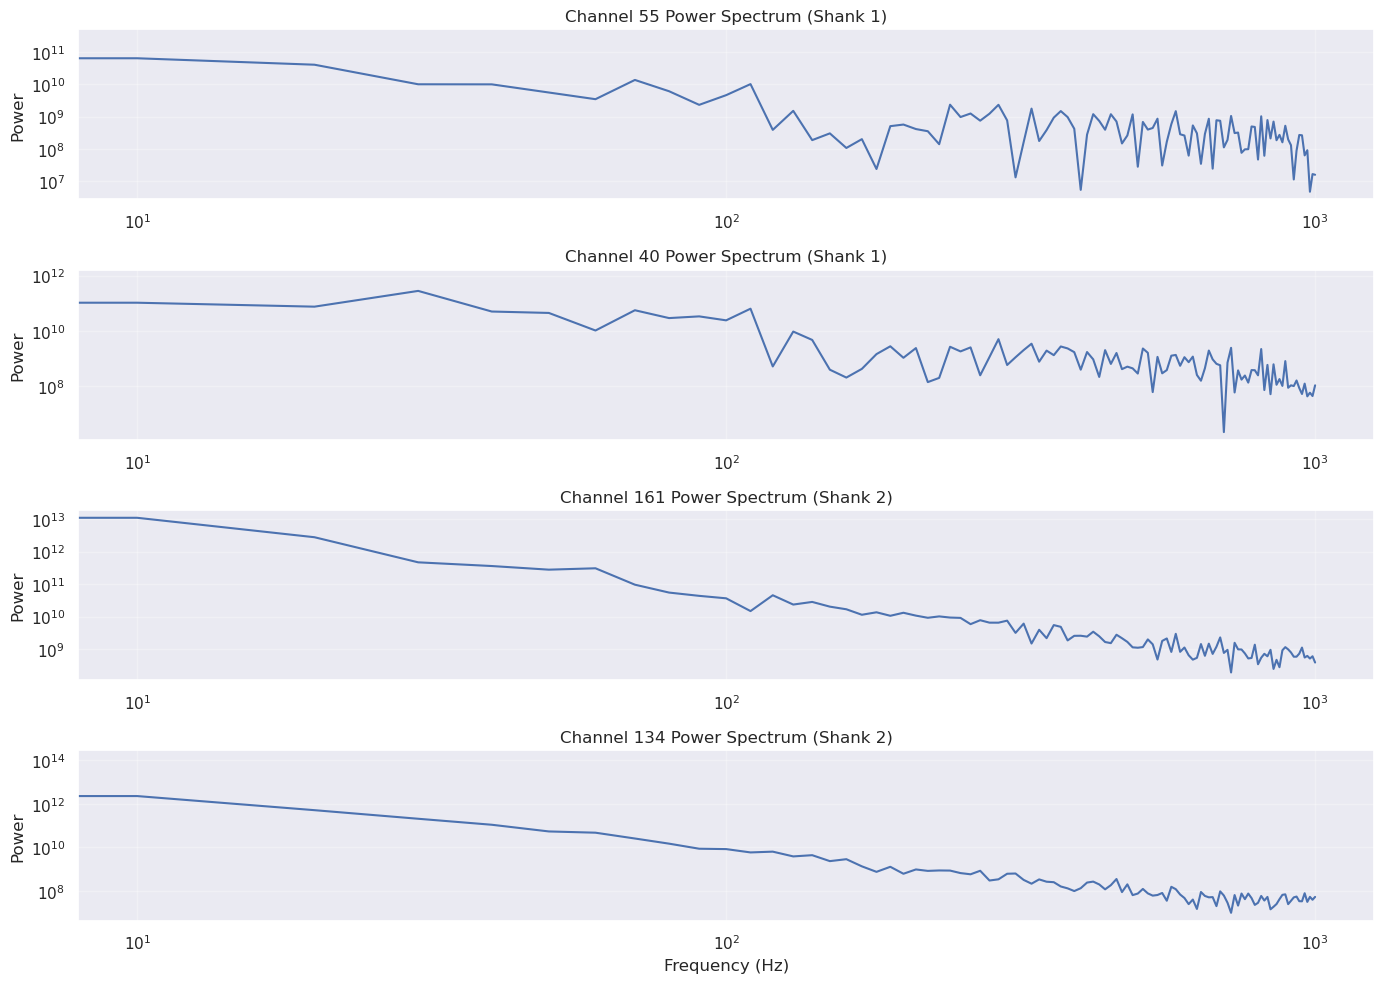

In [13]:
# Calculate and plot power spectra for the same channels
plt.figure(figsize=(14, 10))

for i, channel in enumerate(selected_channels):
    plt.subplot(4, 1, i+1)
    
    # Calculate power spectrum (use entire segment)
    signal = data_segment[:, channel]
    ps = np.abs(np.fft.rfft(signal))**2
    freqs = np.fft.rfftfreq(len(signal), 1/sample_rate)
    
    # Plot only up to 1000 Hz for better visualization
    mask = freqs <= 1000
    plt.loglog(freqs[mask], ps[mask])
    plt.title(f"Channel {channel} Power Spectrum (Shank {'1' if channel in shank1_channels else '2'})")
    plt.ylabel('Power')
    plt.grid(True, alpha=0.3)

plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

The power spectra show the frequency content of the electrophysiology signals:

- All channels show highest power in the low frequency bands (0.5-10 Hz)
- Channels from Shank 1 display more pronouced oscillatory activity in the 10-30 Hz range
- Channels from Shank 2 exhibit a more gradual power decline with frequency, without distinct peaks

These spectral profiles reflect the different neural activity patterns in the recorded regions.

## Analyzing Overall Relationship Between Neural Activity and Behavior

Finally, let's look at the overall relationship between neural activity and the trial structure:

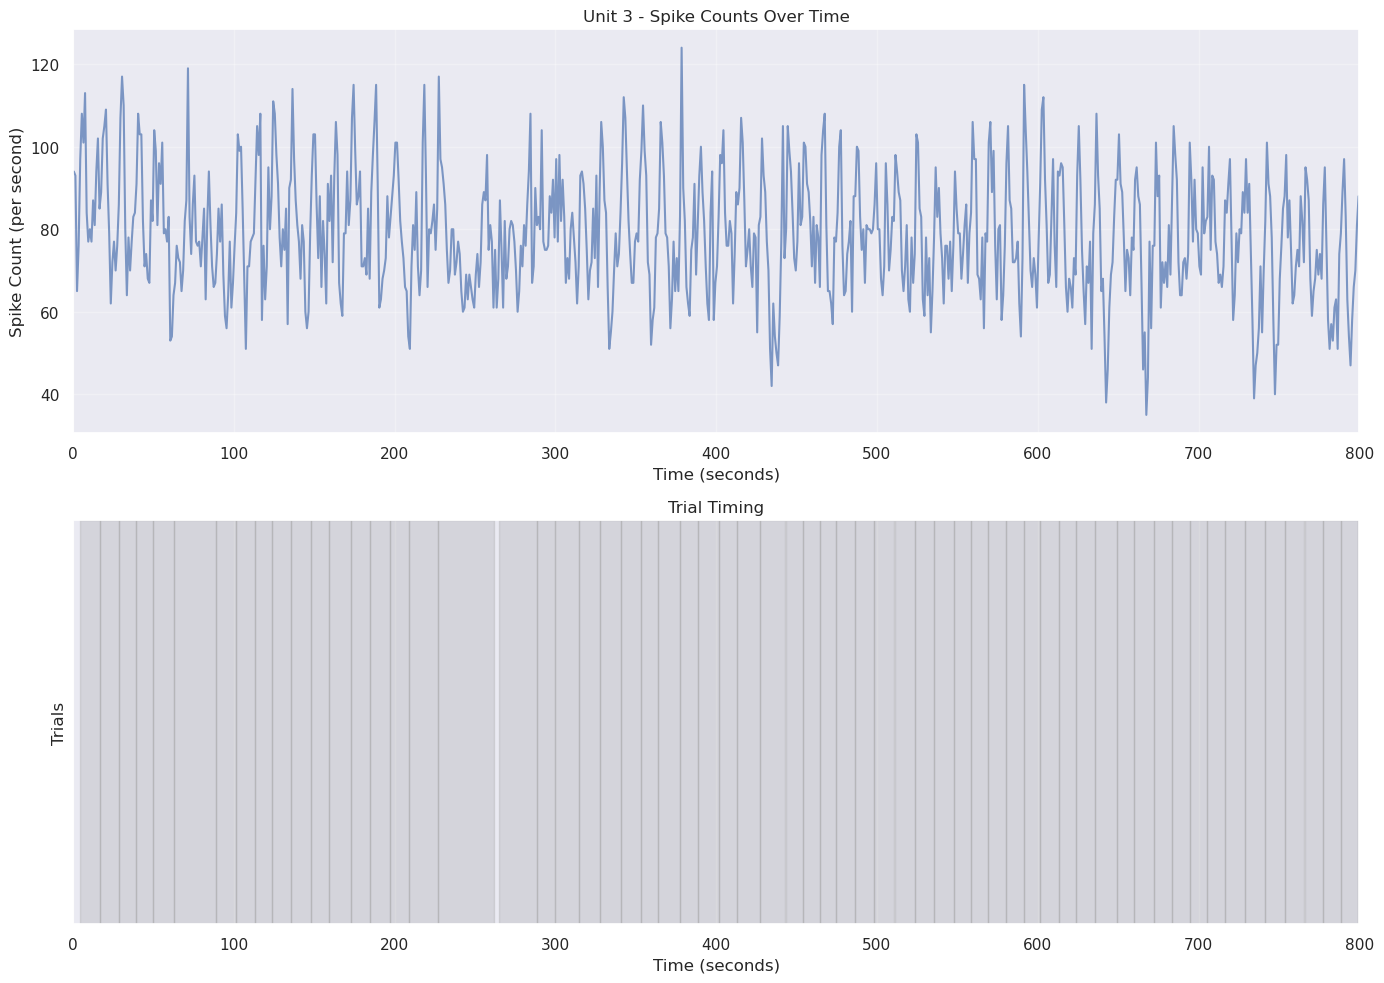

In [14]:
# Use the high firing unit for this analysis
unit_idx = high_firing_idx
unit_id = unit_ids[unit_idx]
spike_times = get_spike_times(units, unit_idx)

# Create bins for counting spikes (using a small subset of the recording for visualization)
max_time = min(recording_duration, 800)  # Limit to 800 seconds for clarity
bin_size = 1.0  # 1-second bins
bins = np.arange(0, max_time + bin_size, bin_size)
spike_counts, _ = np.histogram(spike_times[spike_times < max_time], bins=bins)
bin_centers = bins[:-1] + bin_size/2

plt.figure(figsize=(14, 10))

# Plot spike counts over time
plt.subplot(2, 1, 1)
plt.plot(bin_centers, spike_counts, alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Spike Count (per second)')
plt.title(f'Unit {unit_id} - Spike Counts Over Time')
plt.grid(True, alpha=0.3)
plt.xlim(0, max_time)

# On the same time axis, plot trial start/stop times as vertical spans
plt.subplot(2, 1, 2)
for i in range(len(trials_df)):
    start = trials_df.iloc[i]['start_time']
    stop = trials_df.iloc[i]['stop_time']
    if start < max_time:
        plt.axvspan(start, min(stop, max_time), alpha=0.2, color='gray')

plt.xlabel('Time (seconds)')
plt.ylabel('Trials')
plt.title('Trial Timing')
plt.grid(True, alpha=0.3)
plt.yticks([])
plt.xlim(0, max_time)

plt.tight_layout()
plt.show()

This visualization shows the relationship between neural firing rate and the behavioral trial structure over time. The top panel shows the spike counts per second for the high-firing unit, while the bottom panel shows the timing of trials.

We can observe that the neural activity exhibits some correlation with the ongoing trials, with periods of high activity often coinciding with specific trial events. This suggests that the recorded neurons are likely involved in the sensory processing or motor control aspects of the behavioral task.

## Summary

In this notebook, we've explored Dandiset 001375, which contains electrophysiology recordings from experiments investigating the effects of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity. Here's a summary of what we've learned:

1. **Dataset Structure**: The Dandiset contains three NWB files with electrophysiology recordings from mice running laps in a virtual hallway.

2. **Electrode Configuration**: Recordings were made using silicon probe arrays with two shanks, each with 128 electrodes, positioned in the hippocampus and cortex.

3. **Neural Activity**: We analyzed 33 sorted units with varying firing rates (1.7 to 57.7 Hz). The most active units showed burst-firing patterns, as evident from their inter-spike interval distributions.

4. **Trial Structure**: The behavioral task consisted of trials with an average duration of about 12.3 seconds, though the distribution was skewed with some much longer trials.

5. **Neural-Behavioral Correlations**: We observed that neural activity patterns correlated with trial events, with different units showing distinct timing relationships to trial starts.

6. **Raw Signal Characteristics**: The raw electrophysiology signals showed different patterns between shanks, with oscillatory activity in some channels and baseline drift in others.

This dataset provides valuable insights into how septal GABAergic neurons influence neural activity in the hippocampus and cortex during spatial navigation tasks.

## Future Directions

Future analyses of this dataset could include:

1. **Comparing Activity Between Conditions**: Analyzing differences in neural activity patterns between control and DREADD conditions to understand the effects of septal GABA disruption.

2. **Local Field Potential Analysis**: Extracting and analyzing LFPs to examine oscillatory patterns like theta and gamma rhythms, which are important for hippocampal function.

3. **Place Cell Analysis**: Identifying potential place cells in the hippocampal recordings and analyzing their spatial tuning properties.

4. **Cross-Regional Synchrony**: Examining synchrony and functional connectivity between hippocampal and cortical recording sites.

5. **Detailed Trial Phase Analysis**: Breaking down neural activity by specific phases of each trial to identify correlates of different task components.

This dataset offers rich opportunities for further investigation of how inhibitory septum neurons modulate activity in their target structures during navigation.

## References

- Dandiset 001375: https://dandiarchive.org/dandiset/001375
- PyNWB Documentation: https://pynwb.readthedocs.io/
- DANDI Archive: https://dandiarchive.org/